In [18]:
##################실습 3-2
##################데이터 준비 및 확인


#데이터 불러오기
import pandas as pd
import numpy as np

call = pd.read_excel('CallsData.xls')
contr = pd.read_csv('ContractData.csv')

#기초통계량 확인하기
call.describe()
contr.describe()

,Account Length,Churn,Int'l Plan,VMail Plan,Area Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.144914,0.096910,0.276628,437.182418
std,39.822106,0.352067,0.295879,0.447398,42.371290
min,1.000000,0.000000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,0.000000,0.000000,408.000000
50%,101.000000,0.000000,0.000000,0.000000,415.000000
75%,127.000000,0.000000,0.000000,1.000000,510.000000
max,243.000000,1.000000,1.000000,1.000000,510.000000


In [19]:
#데이터 합치게 컬럼명 확인
print(call.columns)
print(contr.columns)

Index(['VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins',
       'CustServ Calls', 'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge',
       'Night Calls', 'Night Charge', 'Intl Calls', 'Intl Charge', 'Area Code',
       'Phone'],
      dtype='object')
Index(['Account Length', 'Churn', 'Int'l Plan', 'VMail Plan', 'State',
       'Area Code', 'Phone'],
      dtype='object')


In [20]:
#데이터 합치기(inner join)
cd = pd.merge(call, contr, how='inner', on=('Area Code','Phone'))
cd.columns

Index(['VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins',
       'CustServ Calls', 'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge',
       'Night Calls', 'Night Charge', 'Intl Calls', 'Intl Charge', 'Area Code',
       'Phone', 'Account Length', 'Churn', 'Int'l Plan', 'VMail Plan',
       'State'],
      dtype='object')

In [21]:
#합치다가 누락되지는 않았니? + 기초통계량 확인
cd.describe()

,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code,Account Length,Churn,Int'l Plan,VMail Plan
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418,101.064806,0.144914,0.096910,0.276628
std,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290,39.822106,0.352067,0.295879,0.447398
min,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000,74.000000,0.000000,0.000000,0.000000
50%,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000,101.000000,0.000000,0.000000,0.000000
75%,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000,127.000000,0.000000,0.000000,1.000000
max,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000,243.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002381F08D518>,
      dtype=object)

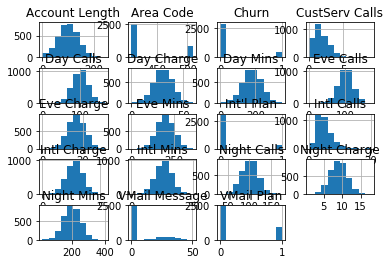

In [22]:
#히스토그램으로 분포 확인
cd.hist()

In [23]:
#사용되지 않을 변수 삭제
print(len(cd.columns))
cd = cd.drop(['Phone','Account Length'], axis=1)
print(len(cd.columns))

21
19


In [25]:
#ㅎㅏ......그럼 명목변수를 또 더미변수로 만들자 아아악
#명목변수 안에 집단이 몇 개가 있나 보기
print(cd['Churn'].unique())   #굳이 안 바꿔도 될듯
print(cd['Area Code'].unique())
print(cd['State'].unique())   #KNIME에서는 변환 안했지만 여기선 해야함

[0 1]
[415 408 510]
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']


In [53]:
#명목변수를 더미변수로 만들자(두솔오빠가 한 방법)
from category_encoders import *
enc = BinaryEncoder(cols=['Area Code','State']).fit(cd)
cd1 = enc.transform(cd)

In [62]:
#잘 만들어졌나? 아 헐 이렇게 쉽다니 ㅁㅊ..
cd1.describe()

,Area Code_0,Area Code_1,Area Code_2,State_0,State_1,State_2,State_3,State_4,State_5,State_6,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Churn,Int'l Plan,VMail Plan
count,3333.0,3333.000000,3333.000000,3333.0,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.0,0.503450,0.748575,0.0,0.382838,0.373537,0.461446,0.452745,0.519052,0.501050,...,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,0.144914,0.096910,0.276628
std,0.0,0.500063,0.433897,0.0,0.486152,0.483815,0.498586,0.497837,0.499712,0.500074,...,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,0.352067,0.295879,0.447398
min,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,0.000000,0.000000,0.000000
50%,0.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,0.000000,0.000000,0.000000
75%,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,0.000000,0.000000,1.000000
max,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,1.000000,1.000000,1.000000


([<matplotlib.patches.Wedge at 0x23820dc96d8>,
 [Text(-0.9879602731612546, 0.4836677564766329, '0'),
  Text(0.9879602505191316, -0.4836678027263907, '1')])

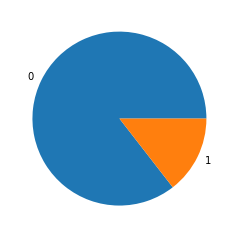

In [55]:
#준거변수 분포 확인(파이 그래프)
count = cd1['Churn'].value_counts()   #frequancy를 series로 바꿈
import matplotlib.pyplot as plt
plt.pie(count[:],labels=count.index)

In [74]:
#데이터 분리(예측변수/준거변수) <- 나중에 표준화하느라 자료형이 array가 되어버려서...미리 함...
make_x = cd1.drop(['Churn'], axis=1)
X = make_x
Y = cd1['Churn']

#데이터 분리(학습/검증)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [76]:
#학습 데이터 변수 표준화(z-score)
from scipy import stats
wow = stats.zscore(x_train)
wow[0:5]
#nan 값이 나오는 건 binary 컬럼 중 값이 없는 거(집단이 없는 것)
#근데 이렇게 표준화하면 array로 바뀌어서 그냥 예의상 한 번 해보고 모델에는 적용하지 않음... 다른 방법 아시는분 헬프

array([[        nan, -1.01435661,  0.58225906,         nan, -0.78720015,
        -0.77227404,  1.07643135,  1.09281228, -1.02892529,  0.98732711,
        -0.58944097,  0.33453467, -0.87964786, -0.37779112, -0.33436406,
         1.09712515,  2.96204072,  0.33480187, -0.65346017, -0.87957332,
        -1.21435318, -0.37979132, -0.60566687, -0.33633574, -0.32096771,
        -0.61579486],
       [        nan, -1.01435661,  0.58225906,         nan,  1.27032495,
         1.29487715, -0.92899561, -0.91507024, -1.02892529,  0.98732711,
        -0.58944097, -0.21688542, -0.78165182, -0.17425789, -0.04996459,
         1.09712515, -0.66743778, -0.2173779 , -0.40380055, -0.78273089,
         0.6028313 , -0.17340834, -0.60566687, -0.04666226, -0.32096771,
        -0.61579486],
       [        nan, -1.01435661,  0.58225906,         nan,  1.27032495,
        -0.77227404, -0.92899561, -0.91507024, -1.02892529,  0.98732711,
        -0.58944097,  1.3285662 , -1.00704271, -0.97653453, -0.22771426,
       

In [66]:
#SMOTE 전 비율 확인
print(sum(y_train==0))
print(sum(y_train==1))

2271
395


In [77]:
#학습 데이터 균형 맞추기
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
x_re, y_re = sm.fit_sample(x_train, y_train.ravel())

In [78]:
#SMOTE 후 비율 확인
print(sum(y_re==0))
print(sum(y_re==1))

2271
2271


In [79]:
#모델 생성(지니)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
DT = DecisionTreeClassifier(criterion = 'gini', random_state = 100, min_samples_split = 6)
DT.fit(x_re, y_re)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [82]:
#모델에 검증 데이터 적용
y_pred = DT.predict(x_test)

In [83]:
#모델 정확도 확인
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[532  47]
 [ 17  71]]
0.904047976011994


In [ ]:
#pmml로 저장해야하는데~!~~~~~@@!!!!~~ 모르겠당~~~@~~~!!~~끼얏호~! > < ㅎㅎㅎㅎㅎ

In [86]:
##################실습 3-2[2]
##################배치


#신규 데이터 불러오기
new = pd.read_csv('newdata.csv')

In [87]:
#새로운 데이터 적용하기
new_pred = DT.predict(new)
#ㅋㅋㅋㅋㅋㅋㅋㅋ아ㅋㅋㅋㅋㅋㅋㅋㅋ신규데이터도 전처리 안하면 예측을 못하는구나

ValueError: could not convert string to float: '354-6960'

In [89]:
#나임에서 모델에 없는 칼럼이 있으면 그 전 노드의 다수 클래스로 넣어준다는 거 체크한걸로 보아 파이썬에도 분명 옵션이 있을텐데
#근데 제가 못찾ㅇ겠어서 ㅎㅎㅎ 무식하게 전처리 고~!


#사용되지 않을 변수 삭제
print(len(new.columns))
new = new.drop(['Phone','Account Length'], axis=1)
print(len(new.columns))

20
18


In [92]:
#명목형 변수 코딩
enc = BinaryEncoder(cols=['Area Code','State']).fit(new)
new1 = enc.transform(new)

#확인하쟈
new1

,Area Code_0,State_0,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Int'l Plan,VMail Plan
0,1,1,0,204.9,135.2,208.2,10.4,5,107,34.83,102,11.49,106,9.37,3,2.81,0,0


In [94]:
#드디어 적용~!
new_pred = DT.predict(new1)
#앙아ㅏ아아ㅏ아아ㅏ아아ㅏ아아아ㅏ아아ㅏ아아아ㅏ아;ㅏㅣ이라ㅓ츠'제ㅑ

ValueError: Number of features of the model must match the input. Model n_features is 26 and input n_features is 18 

In [102]:
#좋아 이쯤되면 오기로 한다
#칼럼 확인
print(new1.columns)
print(x_test.columns)
type(new1)

#없는 칼럼 끼워맞춰주자
new1['Area Code_1'] = 0
new1['Area Code_2'] = 0
new1['State_1'] = 0
new1['State_2'] = 0
new1['State_3'] = 0
new1['State_4'] = 0
new1['State_5'] = 0
new1['State_6'] = 0
new1

Index(['Area Code_0', 'State_0', 'VMail Message', 'Day Mins', 'Eve Mins',
       'Night Mins', 'Intl Mins', 'CustServ Calls', 'Day Calls', 'Day Charge',
       'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge', 'Intl Calls',
       'Intl Charge', 'Int'l Plan', 'VMail Plan', 'Area Code_1', 'Area Code_2',
       'State_1', 'State_2', 'State_3', 'State_4', 'State_5', 'State_6'],
      dtype='object')
Index(['Area Code_0', 'Area Code_1', 'Area Code_2', 'State_0', 'State_1',
       'State_2', 'State_3', 'State_4', 'State_5', 'State_6', 'VMail Message',
       'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins', 'CustServ Calls',
       'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge', 'Int'l Plan',
       'VMail Plan'],
      dtype='object')


,Area Code_0,State_0,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,...,Int'l Plan,VMail Plan,Area Code_1,Area Code_2,State_1,State_2,State_3,State_4,State_5,State_6
0,1,1,0,204.9,135.2,208.2,10.4,5,107,34.83,...,0,0,0,0,0,0,0,0,0,0


In [103]:
#드디어 적용~!
new_pred = DT.predict(new1)
new_pred
#미이탈~! 근데 확률로는 어케 출력하지?? 모르겟당ㅎㅎ휴ㅠㅠㅠㅠㅠㅠ여러분,,,,죄송합니다,,,,

array([0], dtype=int64)